In [535]:
# # Load the Drive helper and mount
# from google.colab import drive
# drive.mount('/content/gdrive')

# Mall Customers Segmentation

In [536]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [537]:
df = pd.read_csv("pengangguran.csv")
df

,Provinsi,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus
0,Aceh,5.97,6.17,64.15,63.50
1,Sumatera Utara,5.47,6.16,70.45,69.53
2,Sumatera Barat,6.17,6.28,68.00,69.30
3,Riau,4.40,4.37,65.98,63.86
4,Jambi,4.70,4.59,68.86,67.84
5,Sumatera Selatan,4.74,4.63,69.33,69.31
6,Bengkulu,3.39,3.59,71.49,69.81
7,Lampung,4.31,4.52,72.51,70.06
8,Kepulauan Bangka Belitung,4.18,4.77,70.16,67.38
9,Kepulauan Riau,8.02,8.23,66.48,68.94


# EDA

In [538]:
df.isna().sum()

Provinsi                                                0
Tingkat Pengangguran Terbuka (TPT) - Februari           0
Tingkat Pengangguran Terbuka (TPT) - Agustus            0
Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari    0
Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus     0
dtype: int64

In [539]:
df.columns

Index(['Provinsi', 'Tingkat Pengangguran Terbuka (TPT) - Februari',
       'Tingkat Pengangguran Terbuka (TPT) - Agustus',
       'Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari',
       'Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus'],
      dtype='object')

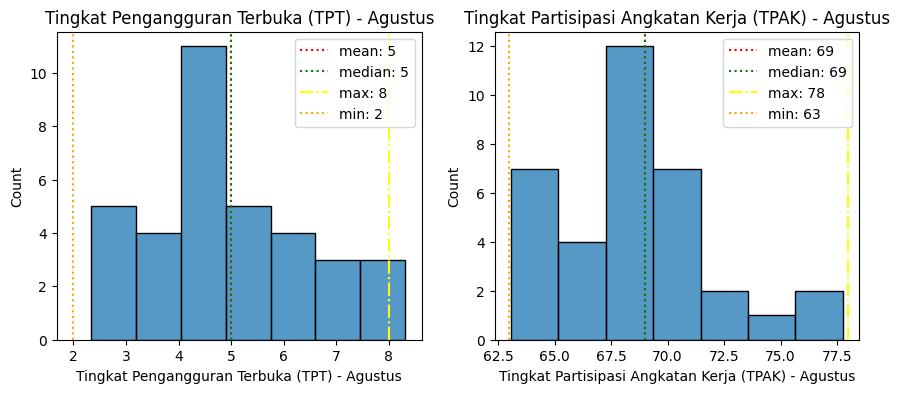

In [540]:
plt.figure(figsize=(16,4))
i = 131
col_to_plot = ['Tingkat Pengangguran Terbuka (TPT) - Agustus', 'Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus']
for col in (col_to_plot):
    plt.subplot(i)
    data = df[col]
    plt.title(f'{col}')
    sns.histplot(data)
    mean = int(round(data.mean()))
    median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
    maxi = int(round(data.max()))
    mini = int(round(data.min()))
    plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
    plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
    plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
    plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
    plt.legend(loc='best')
    i += 1

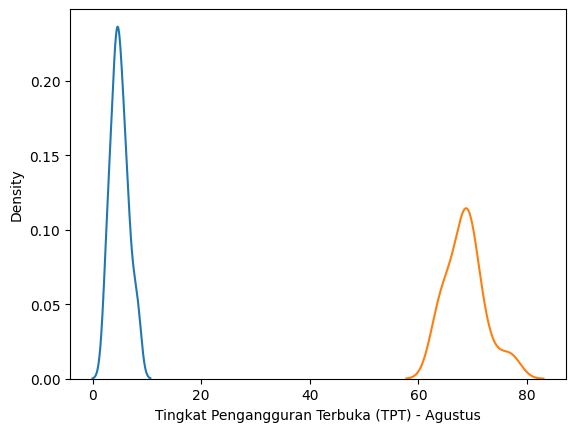

In [541]:
sns.kdeplot(df['Tingkat Pengangguran Terbuka (TPT) - Agustus'])
sns.kdeplot(df['Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus'])
plt.show()

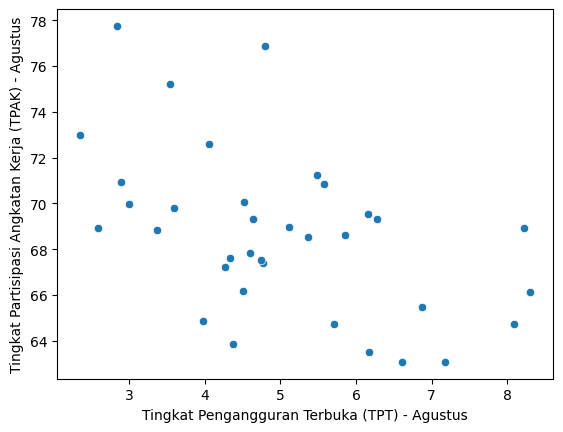

In [542]:
sns.scatterplot(x='Tingkat Pengangguran Terbuka (TPT) - Agustus', y='Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus', data=df)
plt.show()

In [543]:
# df['Gender'].value_counts()

In [544]:
# df_plot = df.copy(deep=True)
# a = []
# b = df_plot.columns.tolist()
# for i in df_plot['Gender'].value_counts().index.tolist():
#     a.extend(df_plot[df_plot['Gender']==i].values)

# df_con = pd.DataFrame(columns=b, data=a)

# plt.figure(figsize=(8,5))
# ax = sns.countplot(x='Gender', data=df_con)
# plt.title('Count Gender')
# plt.xlabel('\nGender')
# plt.ylabel('Count')
# # plt.xticks(rotation=90)

# for p in ax.patches:
#     ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+1), ha="center", fontsize=11)

In [545]:
# fig = plt.figure(figsize=(10,5))
# # fig.patch.set_facecolor('xkcd:white')
# plt.title('Gender Percentage')
# sizes = df['Gender'].value_counts().values.tolist()
# labels = df['Gender'].value_counts().index.tolist()

# plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
# plt.show()

In [546]:
# sns.heatmap(df.drop(['CustomerID','Gender'],axis=1).corr(), annot=True)

In [547]:
# data = df.drop(['CustomerID','Gender'],axis=1)
# ut = np.triu(data.corr())
# # lt = np.tril(data.corr())
# sns.heatmap(data.corr(), annot=True, cbar='True', mask=ut)
# plt.show()

# Scaling

In [548]:
from sklearn.preprocessing import MinMaxScaler

In [549]:
df2 = df.copy(deep=True)
df2['TPT'] = MinMaxScaler().fit_transform(df2[['Tingkat Pengangguran Terbuka (TPT) - Agustus']])
df2['TPAK'] = MinMaxScaler().fit_transform(df2[['Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus']])
df2

,Provinsi,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus,TPT,TPAK
0,Aceh,5.97,6.17,64.15,63.50,0.641541,0.028630
1,Sumatera Utara,5.47,6.16,70.45,69.53,0.639866,0.439673
2,Sumatera Barat,6.17,6.28,68.00,69.30,0.659966,0.423995
3,Riau,4.40,4.37,65.98,63.86,0.340034,0.053170
4,Jambi,4.70,4.59,68.86,67.84,0.376884,0.324472
5,Sumatera Selatan,4.74,4.63,69.33,69.31,0.383585,0.424676
6,Bengkulu,3.39,3.59,71.49,69.81,0.209380,0.458759
7,Lampung,4.31,4.52,72.51,70.06,0.365159,0.475801
8,Kepulauan Bangka Belitung,4.18,4.77,70.16,67.38,0.407035,0.293115
9,Kepulauan Riau,8.02,8.23,66.48,68.94,0.986600,0.399455


In [550]:
print(df2['TPT'].min())
print(df2['TPT'].max())
print(df2['TPAK'].min())
print(df2['TPAK'].max())

0.0
1.0
0.0
1.0


# Partioning Clustering (K-Means)

In [551]:
from sklearn.cluster import KMeans

## Elbow Method

In [552]:
k = range(1,10)
inertia = []

for i in k:
    km_model = KMeans(n_clusters=i) # jumlah cluster akan di looping
    km_model.fit(df2[['TPT','TPAK']])
    inertia.append(km_model.inertia_)

print(list(k))
print(inertia)

c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[4.425030243485517, 2.367643950942115, 1.4030069547577786, 1.0261547982286914, 0.7136610503264227, 0.5138090489499785, 0.4334915697502071, 0.3930397608857019, 0.3249389254769109]


c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


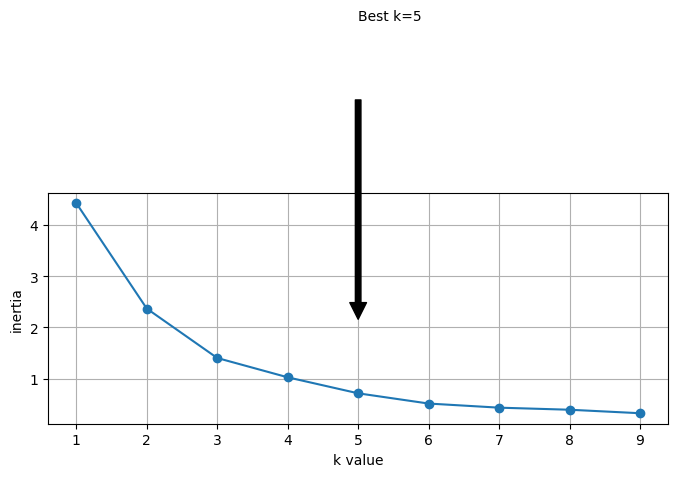

In [553]:
plt.figure(figsize=(8,3))
plt.plot(k, inertia, marker='o')
plt.xlabel('k value')
plt.ylabel('inertia')
plt.annotate(
    'Best k=5', xy = (k[4], inertia[4]),
    xytext = (5, 8), arrowprops = dict(facecolor='black', shrink=0.2)
)
plt.grid()
plt.show()

c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

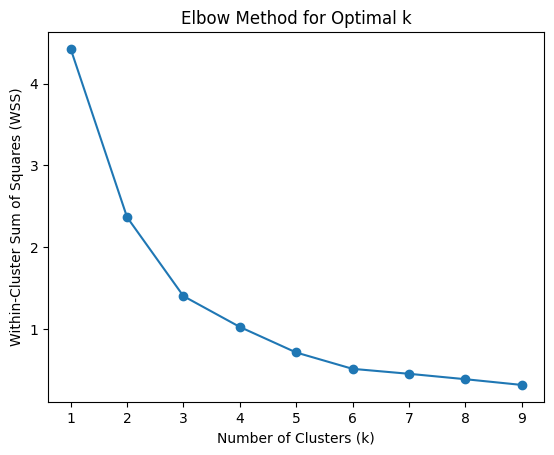

In [554]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Inisialisasi nilai k
k_values = range(1, 10)
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Inisialisasi list untuk menampung nilai WSS
wss_values = []

# Melakukan KMeans untuk setiap nilai k dan menghitung WSS
for k in k_values:
    kmeans = KMeans(n_clusters=k,max_iter=50,random_state=42)
    kmeans.fit(df2[['TPT','TPAK']])
    wss_values.append(kmeans.inertia_)

# Menampilkan grafik elbow
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()


## Clustering

In [555]:
kn5 = KMeans(n_clusters=3, random_state=1)
kn5

KMeans(n_clusters=3, random_state=1)

In [556]:
kn5.fit(df2[['TPT','TPAK']])

c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [557]:
kn5.labels_

array([0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2])

In [558]:
df['Cluster_KM'] = kn5.predict(df2[['TPT','TPAK']])
df2['Cluster_KM'] = kn5.predict(df2[['TPT','TPAK']])
# display(df)
display(df2)

,Provinsi,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus,TPT,TPAK,Cluster_KM
0,Aceh,5.97,6.17,64.15,63.50,0.641541,0.028630,0
1,Sumatera Utara,5.47,6.16,70.45,69.53,0.639866,0.439673,2
2,Sumatera Barat,6.17,6.28,68.00,69.30,0.659966,0.423995,2
3,Riau,4.40,4.37,65.98,63.86,0.340034,0.053170,2
4,Jambi,4.70,4.59,68.86,67.84,0.376884,0.324472,2
5,Sumatera Selatan,4.74,4.63,69.33,69.31,0.383585,0.424676,2
6,Bengkulu,3.39,3.59,71.49,69.81,0.209380,0.458759,1
7,Lampung,4.31,4.52,72.51,70.06,0.365159,0.475801,2
8,Kepulauan Bangka Belitung,4.18,4.77,70.16,67.38,0.407035,0.293115,2
9,Kepulauan Riau,8.02,8.23,66.48,68.94,0.986600,0.399455,0


In [559]:
from sklearn import metrics
labels = kn5.labels_
metrics.silhouette_score(df2[['TPT','TPAK']], labels, metric='euclidean')

0.4103035609996608

In [560]:
df2[['TPT','TPAK']].head()

,TPT,TPAK
0,0.641541,0.028630
1,0.639866,0.439673
2,0.659966,0.423995
3,0.340034,0.053170
4,0.376884,0.324472


In [561]:
kn5_b = KMeans(n_clusters=3, random_state=1)
kn5_b.fit(df2[['Tingkat Pengangguran Terbuka (TPT) - Agustus','Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus']])
kn5_b.labels_

c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2])

In [562]:
from sklearn import metrics
labels = kn5_b.labels_
metrics.silhouette_score(df2[['Tingkat Pengangguran Terbuka (TPT) - Agustus','Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus']], labels, metric='euclidean')

0.48474748804516454

In [563]:
# 0.5594854531227246 # artinya kmeans lebih bagus jika memetakan dengan nilai scaled

## Visualization

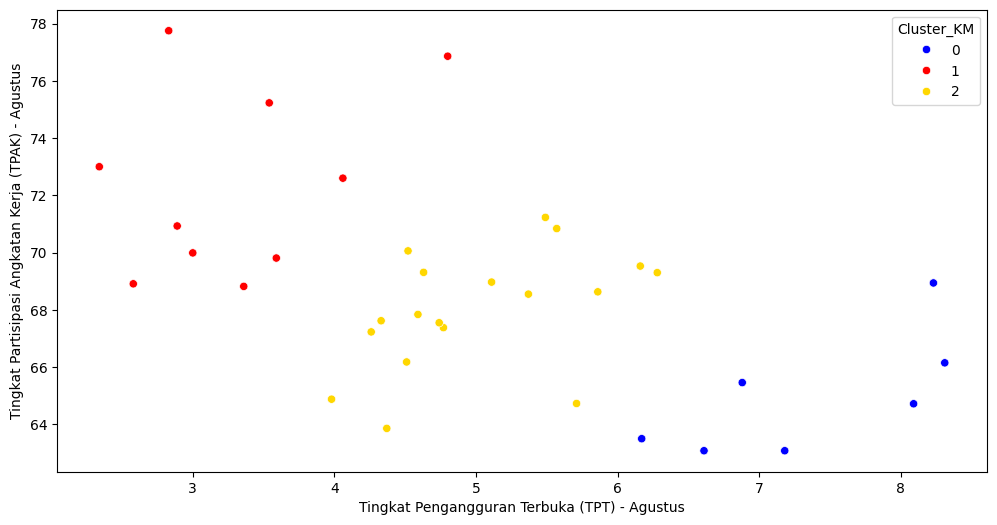

In [564]:
plt.figure(figsize=(12,6))
palette = ['blue','red','gold']
sns.scatterplot(x='Tingkat Pengangguran Terbuka (TPT) - Agustus', y='Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus', hue='Cluster_KM', data=df, palette=palette)
plt.show()

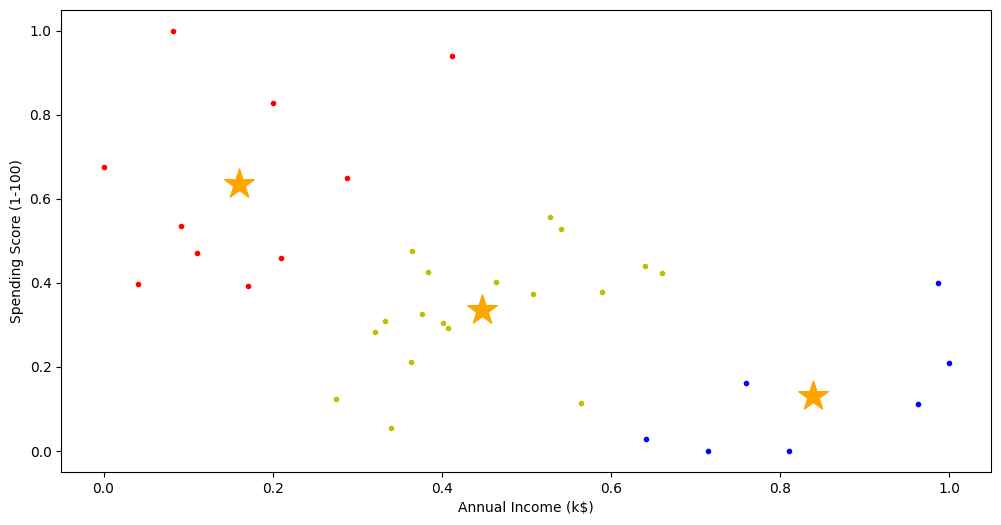

In [565]:
plt.figure(figsize=(12,6))
plt.scatter(
    kn5.cluster_centers_[:,0],
    kn5.cluster_centers_[:,1],
    color='orange', marker='*', s=500
)
plt.plot(df2['TPT'][df2['Cluster_KM']==0].values, df2['TPAK'][df2['Cluster_KM']==0].values, 'b.')
plt.plot(df2['TPT'][df2['Cluster_KM']==1].values, df2['TPAK'][df2['Cluster_KM']==1].values, 'r.')
plt.plot(df2['TPT'][df2['Cluster_KM']==2].values, df2['TPAK'][df2['Cluster_KM']==2].values, 'y.')
# plt.plot(df2['Annual Income (k$)_2'][df2['Cluster_KM']==3].values, df2['Spending Score (1-100)_2'][df2['Cluster_KM']==3].values, 'g.')
# plt.plot(df2['Annual Income (k$)_2'][df2['Cluster_KM']==4].values, df2['Spending Score (1-100)_2'][df2['Cluster_KM']==4].values, 'c.')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [566]:
# plt.figure(figsize=(16,5))

# plt.subplot(121)
# sns.boxplot(x='Cluster_KM', y='Age', data=df, palette=palette)

# plt.subplot(122)
# sns.boxplot(x='Cluster_KM', y='Age', hue='Gender', data=df, palette=palette)

# plt.show()

In [567]:
# plt.figure(figsize=(16,5))

# plt.subplot(121)
# plt.title('Female')
# sns.boxplot(x='Cluster_KM', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)

# plt.subplot(122)
# plt.title('Male')
# sns.boxplot(x='Cluster_KM', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)

# plt.show()

In [568]:
# plt.figure(figsize=(16,4))
# i = 121
# col_to_plot = ['Female','Male']
# no_cluster = 1  # ada pilihan cluster (0,1,2,3,4)
# for col in (col_to_plot):
#   plt.subplot(i)
#   # data = df[col]
#   data = df[(df['Cluster_KM']==no_cluster) & (df['Gender']==col)]['Age']
#   plt.title(f'Age of {col} in K-Means Cluster {no_cluster}')
#   sns.histplot(data)
#   mean = int(round(data.mean()))
#   median = int(round(data.median()))
# #     mode = round(int(data.mode()[0]))
#   maxi = int(round(data.max()))
#   mini = int(round(data.min()))
#   plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
#   plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
# #     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
#   plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
#   plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
#   plt.legend(loc='best')
#   i += 1

# Hierarchical Clustering (Linkage)

In [569]:
from scipy.cluster.hierarchy import dendrogram, linkage

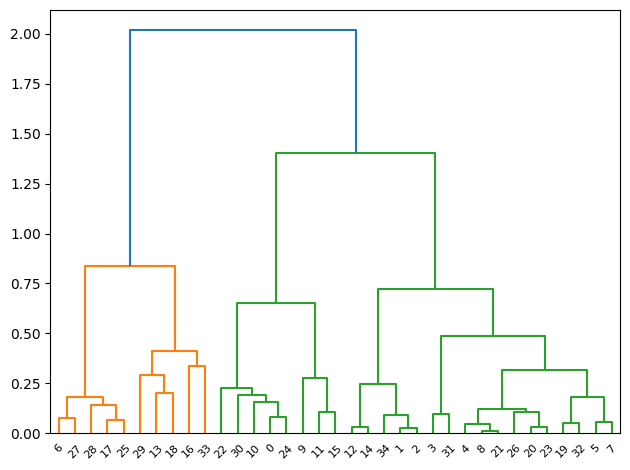

In [570]:
linkage_data = linkage(df2[['TPT','TPAK']], method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [571]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(df2[['TPT','TPAK']])

pred_agc = pd.Series(hierarchical_cluster.labels_)
df2['Cluster_HA'] = pred_agc; df['Cluster_HA'] = pred_agc

c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [572]:
# display(df)
display(df2)

,Provinsi,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus,TPT,TPAK,Cluster_KM,Cluster_HA
0,Aceh,5.97,6.17,64.15,63.50,0.641541,0.028630,0,2
1,Sumatera Utara,5.47,6.16,70.45,69.53,0.639866,0.439673,2,1
2,Sumatera Barat,6.17,6.28,68.00,69.30,0.659966,0.423995,2,1
3,Riau,4.40,4.37,65.98,63.86,0.340034,0.053170,2,1
4,Jambi,4.70,4.59,68.86,67.84,0.376884,0.324472,2,1
5,Sumatera Selatan,4.74,4.63,69.33,69.31,0.383585,0.424676,2,1
6,Bengkulu,3.39,3.59,71.49,69.81,0.209380,0.458759,1,0
7,Lampung,4.31,4.52,72.51,70.06,0.365159,0.475801,2,1
8,Kepulauan Bangka Belitung,4.18,4.77,70.16,67.38,0.407035,0.293115,2,1
9,Kepulauan Riau,8.02,8.23,66.48,68.94,0.986600,0.399455,0,2


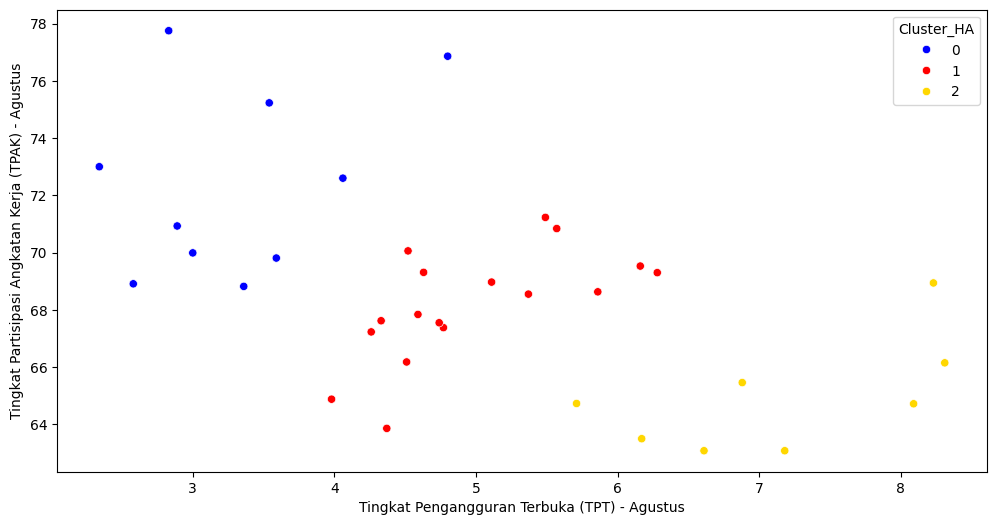

In [573]:
plt.figure(figsize=(12,6))
palette = ['blue','red','gold']
sns.scatterplot(x='Tingkat Pengangguran Terbuka (TPT) - Agustus', y='Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus', hue='Cluster_HA', data=df, palette=palette)
plt.show()

In [574]:
# plt.figure(figsize=(16,5))

# plt.subplot(121)
# sns.boxplot(x='Cluster_HA', y='Age', data=df, palette=palette)

# plt.subplot(122)
# sns.boxplot(x='Cluster_HA', y='Age', hue='Gender', data=df, palette=palette)

# plt.show()

In [575]:
# plt.figure(figsize=(16,5))

# plt.subplot(121)
# plt.title('Female')
# sns.boxplot(x='Cluster_HA', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)

# plt.subplot(122)
# plt.title('Male')
# sns.boxplot(x='Cluster_HA', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)

# plt.show()

In [576]:
# plt.figure(figsize=(16,4))
# i = 121
# col_to_plot = ['Female','Male']
# no_cluster = 1
# for col in (col_to_plot):
#   plt.subplot(i)
#   # data = df[col]
#   data = df[(df['Cluster_HA']==no_cluster) & (df['Gender']==col)]['Age']
#   plt.title(f'Age of {col} in Hierarchical Agglomerative Cluster {no_cluster}')
#   sns.histplot(data)
#   mean = int(round(data.mean()))
#   median = int(round(data.median()))
# #     mode = round(int(data.mode()[0]))
#   maxi = int(round(data.max()))
#   mini = int(round(data.min()))
#   plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
#   plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
# #     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
#   plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
#   plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
#   plt.legend(loc='best')
#   i += 1

# DBSCAN Clustering (Linkage)

In [577]:
from sklearn.cluster import DBSCAN

In [578]:
db_model = DBSCAN(eps = 0.1, min_samples = 3).fit(df2[['TPT','TPAK']])
db_model

DBSCAN(eps=0.1, min_samples=3)

In [579]:
labels = db_model.labels_
print('Cluster yang terbentuk: ', pd.unique(labels))
print(labels)

Cluster yang terbentuk:  [ 3  0 -1  1  2]
[ 3  0  0 -1  1  0  2  0  1 -1  3 -1 -1 -1 -1 -1 -1  2 -1  0  1  1 -1  1
  3  2  1  2 -1 -1 -1 -1  0 -1  0]


In [580]:
df['Cluster_DB'] = labels
df2['Cluster_DB'] = labels
# display(df)
display(df2)

,Provinsi,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus,TPT,TPAK,Cluster_KM,Cluster_HA,Cluster_DB
0,Aceh,5.97,6.17,64.15,63.50,0.641541,0.028630,0,2,3
1,Sumatera Utara,5.47,6.16,70.45,69.53,0.639866,0.439673,2,1,0
2,Sumatera Barat,6.17,6.28,68.00,69.30,0.659966,0.423995,2,1,0
3,Riau,4.40,4.37,65.98,63.86,0.340034,0.053170,2,1,-1
4,Jambi,4.70,4.59,68.86,67.84,0.376884,0.324472,2,1,1
5,Sumatera Selatan,4.74,4.63,69.33,69.31,0.383585,0.424676,2,1,0
6,Bengkulu,3.39,3.59,71.49,69.81,0.209380,0.458759,1,0,2
7,Lampung,4.31,4.52,72.51,70.06,0.365159,0.475801,2,1,0
8,Kepulauan Bangka Belitung,4.18,4.77,70.16,67.38,0.407035,0.293115,2,1,1
9,Kepulauan Riau,8.02,8.23,66.48,68.94,0.986600,0.399455,0,2,-1


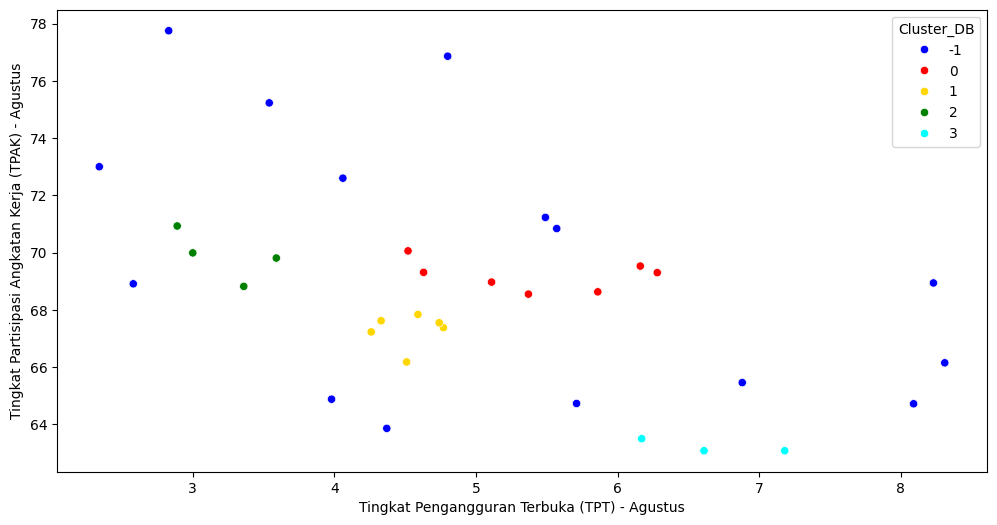

In [581]:
plt.figure(figsize=(12,6))
palette = ['blue','red','gold','green','cyan']
sns.scatterplot(x='Tingkat Pengangguran Terbuka (TPT) - Agustus', y='Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus', hue='Cluster_DB', data=df, palette=palette)
plt.show()

In [582]:
# plt.figure(figsize=(16,5))

# plt.subplot(121)
# sns.boxplot(x='Cluster_DB', y='Age', data=df, palette=palette)

# plt.subplot(122)
# sns.boxplot(x='Cluster_DB', y='Age', hue='Gender', data=df, palette=palette)

# plt.show()

In [583]:
# plt.figure(figsize=(16,5))

# plt.subplot(121)
# plt.title('Female')
# sns.boxplot(x='Cluster_DB', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)

# plt.subplot(122)
# plt.title('Male')
# sns.boxplot(x='Cluster_DB', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)

# plt.show()

In [584]:
# plt.figure(figsize=(16,4))
# i = 121
# col_to_plot = ['Female','Male']
# no_cluster = 1
# for col in (col_to_plot):
#   plt.subplot(i)
#   # data = df[col]
#   data = df[(df['Cluster_DB']==no_cluster) & (df['Gender']==col)]['Age']
#   plt.title(f'Age of {col} in DBSCAN Cluster {no_cluster}')
#   sns.histplot(data)
#   mean = int(round(data.mean()))
#   median = int(round(data.median()))
# #     mode = round(int(data.mode()[0]))
#   maxi = int(round(data.max()))
#   mini = int(round(data.min()))
#   plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
#   plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
# #     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
#   plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
#   plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
#   plt.legend(loc='best')
#   i += 1

# Grid-Based Clustering (Linkage)

In [585]:
from pyclustering.cluster.clique import clique # Select clustering method: clique class
from pyclustering.cluster.clique import clique_visualizer # clique visualization

In [586]:
# Create CLIQUE algorithm for processing
intervals = 5 # Define the number of grid cells in each dimension
threshold = 2 # Density threshold
clique_instance = clique(df2[['TPT','TPAK']].values, intervals, threshold)

In [587]:
# Start the clustering process and get the results
clique_instance.process()
clique_cluster = clique_instance.get_clusters()  # allocated clusters

In [588]:
# Points considered as outliers (noise points)
noise = clique_instance.get_noise()
# CLIQUE formed grid unit
cells = clique_instance.get_cells()

In [589]:
print("Amount of clusters:", len(clique_cluster))
print(clique_cluster)

Amount of clusters: 2
[[0, 24, 30], [4, 20, 23, 26, 8, 21, 32, 34, 5, 6, 7, 12, 14, 19]]


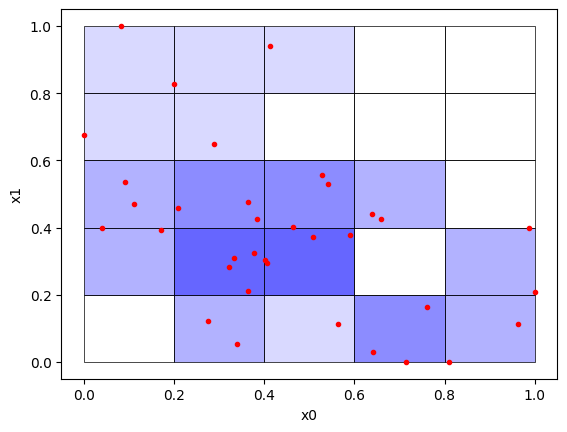

In [590]:
# Display the grid formed by the algorithm
clique_visualizer.show_grid(cells, df2[['TPT','TPAK']].values)

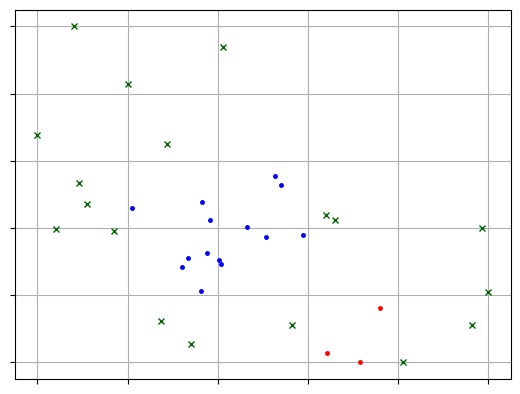

In [591]:
# Display clustering results
clique_visualizer.show_clusters(df2[["TPT",'TPAK']].values, clique_cluster, noise)  # show clustering results

In [592]:
print(len(df))
print(len(clique_cluster[0]) + len(clique_cluster[1]) + len(noise))


35
35


In [593]:
df

,Provinsi,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus,Cluster_KM,Cluster_HA,Cluster_DB
0,Aceh,5.97,6.17,64.15,63.50,0,2,3
1,Sumatera Utara,5.47,6.16,70.45,69.53,2,1,0
2,Sumatera Barat,6.17,6.28,68.00,69.30,2,1,0
3,Riau,4.40,4.37,65.98,63.86,2,1,-1
4,Jambi,4.70,4.59,68.86,67.84,2,1,1
5,Sumatera Selatan,4.74,4.63,69.33,69.31,2,1,0
6,Bengkulu,3.39,3.59,71.49,69.81,1,0,2
7,Lampung,4.31,4.52,72.51,70.06,2,1,0
8,Kepulauan Bangka Belitung,4.18,4.77,70.16,67.38,2,1,1
9,Kepulauan Riau,8.02,8.23,66.48,68.94,0,2,-1


In [594]:
df['Cluster_CL'] = -1  # Inisialisasi dengan -1 (noise)
df2['Cluster_CL'] = -1  # Inisialisasi dengan -1 (noise)

# Memetakan setiap sampel ke cluster yang sesuai
for cluster_id, cluster in enumerate(clique_cluster):
    for sample_id in cluster:
        df.loc[sample_id, "Cluster_CL"] = cluster_id
        df2.loc[sample_id, "Cluster_CL"] = cluster_id

# Menangani noise points
for noise_id in noise:
    df.loc[noise_id, "Cluster_CL"] = -1
    df2.loc[noise_id, "Cluster_CL"] = -1

In [595]:
# display(df)
display(df2)

,Provinsi,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus,TPT,TPAK,Cluster_KM,Cluster_HA,Cluster_DB,Cluster_CL
0,Aceh,5.97,6.17,64.15,63.50,0.641541,0.028630,0,2,3,0
1,Sumatera Utara,5.47,6.16,70.45,69.53,0.639866,0.439673,2,1,0,-1
2,Sumatera Barat,6.17,6.28,68.00,69.30,0.659966,0.423995,2,1,0,-1
3,Riau,4.40,4.37,65.98,63.86,0.340034,0.053170,2,1,-1,-1
4,Jambi,4.70,4.59,68.86,67.84,0.376884,0.324472,2,1,1,1
5,Sumatera Selatan,4.74,4.63,69.33,69.31,0.383585,0.424676,2,1,0,1
6,Bengkulu,3.39,3.59,71.49,69.81,0.209380,0.458759,1,0,2,1
7,Lampung,4.31,4.52,72.51,70.06,0.365159,0.475801,2,1,0,1
8,Kepulauan Bangka Belitung,4.18,4.77,70.16,67.38,0.407035,0.293115,2,1,1,1
9,Kepulauan Riau,8.02,8.23,66.48,68.94,0.986600,0.399455,0,2,-1,-1


In [596]:
# display(df['Cluster_CL'].value_counts())
display(df2['Cluster_CL'].value_counts())

Cluster_CL
-1    18
 1    14
 0     3
Name: count, dtype: int64

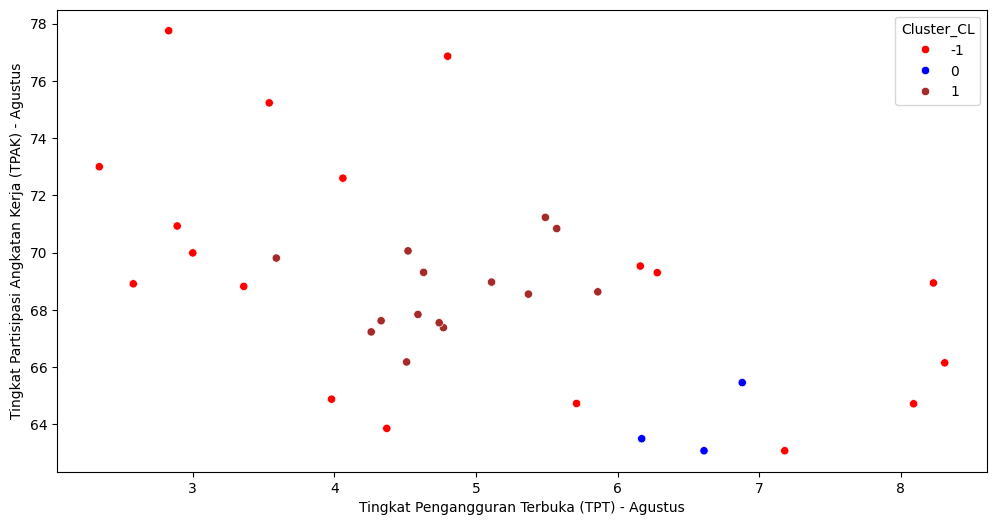

In [597]:
plt.figure(figsize=(12,6))
palette = ['red','blue','brown']
sns.scatterplot(x='Tingkat Pengangguran Terbuka (TPT) - Agustus', y='Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus', hue='Cluster_CL', data=df, palette=palette)
plt.show()

In [598]:
# plt.figure(figsize=(16,5))

# plt.subplot(121)
# sns.boxplot(x='Cluster_CL', y='Age', data=df, palette=palette)

# plt.subplot(122)
# sns.boxplot(x='Cluster_CL', y='Age', hue='Gender', data=df, palette=palette)

# plt.show()

In [599]:
# plt.figure(figsize=(16,5))

# plt.subplot(121)
# plt.title('Female')
# sns.boxplot(x='Cluster_CL', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)

# plt.subplot(122)
# plt.title('Male')
# sns.boxplot(x='Cluster_CL', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)

# plt.show()

In [600]:
# plt.figure(figsize=(16,4))
# i = 121
# col_to_plot = ['Female','Male']
# no_cluster = 1
# for col in (col_to_plot):
#   plt.subplot(i)
#   # data = df[col]
#   data = df[(df['Cluster_CL']==no_cluster) & (df['Gender']==col)]['Age']
#   plt.title(f'Age of {col} in Clique Cluster {no_cluster}')
#   sns.histplot(data)
#   mean = int(round(data.mean()))
#   median = int(round(data.median()))
# #     mode = round(int(data.mode()[0]))
#   maxi = int(round(data.max()))
#   mini = int(round(data.min()))
#   plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
#   plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
# #     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
#   plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
#   plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
#   plt.legend(loc='best')
#   i += 1